In [16]:
#Please execute this cell
import sys
sys.path.append('../../')
import jupman
from sciprog import draw_mat
from sciprog import draw_nx
from sciprog import draw_adj
%matplotlib inline

# Network statistics solutions

## [Download exercises zip](../../_static/network-statistics-exercises.zip)

[Browse files online](https://github.com/DavidLeoni/datasciprolab/tree/master/exercises/network-statistics)


## What to do

- **Make sure you have installed** [the required libraries](https://datasciprolab.readthedocs.io/en/latest/exercises/matrix-networks/matrix-networks-solution.html#Required-libraries)
- unzip exercises in a folder, you should get something like this: 

```

-jupman.py
-sciprog.py
-other stuff ...
-exercises
     |- network-statistics
         |- network-statistics-exercise.ipynb     
         |- network-statistics-solution.ipynb
         |- other stuff ..
```

<div class="alert alert-warning">

**WARNING 1**: to correctly visualize the notebook, it MUST be in an unzipped folder !
</div>


- open Jupyter Notebook from that folder. Two things should open, first a console and then browser. 
- The browser should show a file list: navigate the list and open the notebook `exercises/network-statistics/network-statistics-exercise.ipynb`

<div class="alert alert-warning">

**WARNING 2**: DO NOT use the _Upload_ button in Jupyter, instead navigate in Jupyter browser to the unzipped folder !
</div>

- Go on reading that notebook, and follow instuctions inside.


Shortcut keys:

- to execute Python code inside a Jupyter cell, press `Control + Enter`
- to execute Python code inside a Jupyter cell AND select next cell, press `Shift + Enter`
- to execute Python code inside a Jupyter cell AND a create a new cell aftwerwards, press `Alt + Enter`
- If the notebooks look stuck, try to select `Kernel -> Restart`





## Simple statistics

<div class="alert alert-warning">

**WARNING**: Before proceeding any further, make sure you did the [exercises about binary relations](https://datasciprolab.readthedocs.io/en/latest/exercises/binary-relations/binary-relations-solution.html)
</div>


### Outdegrees and indegrees

The _out-degree_ $\deg^+(v)$ of a node $v$ is the number of edges going out from it, while the _in-degree_ $\deg^-(v)$ is the number of edges going into it. 

_NOTE_: the out-degree and in-degree are _not_ the sum of weights ! They just count presence or absence of edges.

For example, consider this graph:


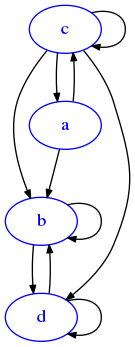

In [2]:
from sciprog import draw_adj

d = {
    'a' : ['b','c'],  
    'b' : ['b','d'],  
    'c' : ['a','b','c','d'],  
    'd' : ['b','d']   
}


draw_adj(d)

The out-degree of `d` is 2, because it has one outgoing edge to `b` but also an outgoing edge to itself. The indegree of `d` is 3, because it has an edge coming from `b`, one from `c` and one self-loop from `d` itself.

### outdegree_adj

In [3]:
def outdegree_adj(d, v):
    """ RETURN the outdegree of a node from graph d represented as a dictionary of adjacency lists
    
        If v is not a vertex of d, raise ValueError
    """
    #jupman-raise
    if v not in d:
        raise ValueError("Vertex %s is not in %s" % (v, d))
    
    return len(d[v])
    #/jupman-raise

try: 
    outdegree_adj({'a':[]},'b')
    raise Exception("SHOULD HAVE FAILED !")  
except ValueError: 
    "passed test"
    
assert outdegree_adj({
        'a':[]
},'a') == 0

assert outdegree_adj({
        'a':['a']
},'a') == 1

assert outdegree_adj({
        'a':['a','b'],
        'b':[]
},'a') == 2

assert outdegree_adj({
        'a':['a','b'],
        'b':['a','b','c'],
        'c':[]
},'b') == 3




### outdegree_mat

Difficulty: ✪✪


In [4]:
def outdegree_mat(mat, i):
    """ RETURN the outdegree of a node i from a graph boolean matrix nxn represented as a list of lists
    
        If i is not a node of the graph, raise ValueError
    """
    #jupman-raise
    n = len(mat)
    if i < 0 or i > n: 
        raise ValueError("i %s is not a row of matrix %s" % (i, mat))
    ret = 0    
    for j in range(n):
        if mat[i][j]:
            ret += 1
    return ret
    #/jupman-raise

try: 
    outdegree_mat([[False]],7)
    raise Exception("SHOULD HAVE FAILED !")  
except ValueError: 
    "passed test"

try: 
    outdegree_mat([[False]],-1)
    raise Exception("SHOULD HAVE FAILED !")  
except ValueError: 
    "passed test"

    
assert outdegree_mat(
        [
            [False]
        ]
,0) == 0

assert outdegree_mat(
        [
            [True]
        ],0) == 1

assert outdegree_mat(
        [
            [True, True],
            [False, False]
        ],0) == 2

assert outdegree_mat(
        [
            [True, True, False],
            [True, True, True],
            [False, False, False],            
        ]
,1) == 3


### outdegree_avg

Difficulty: ✪✪


In [5]:
def outdegree_avg(d):
    """
    RETURN the average outdegree of nodes in graph d, represented as dictionary of adjacency lists. 
    
    Assume all nodes are in the keys.
    """
    #jupman-raise
    s = 0
    for k in d: 
        s += len(d[k])
    return s / len(d)
    #/jupman-raise
    
assert outdegree_avg({
        'a':[]
}) == 0

assert round(
                outdegree_avg({
                    'a':['a']
                })
            ,2) == 1.00 / 1.00

assert round(
                outdegree_avg({
                    'a':['a','b'],
                    'b':[]
                })
            ,2) == (2 + 0) / 2

assert round(
                outdegree_avg({
                    'a':['a','b'],
                    'b':['a','b','c'],
                    'c':[]
                }) 
        ,2) == round( (2 + 3) / 3 , 2)

### indegree_adj

✪✪ The indegree of a node $v$ s the number of edges going into it. 


In [6]:
def indegree_adj(d, v):
    """ RETURN the indegree of node v in graph d, represented as a dictionary of adjacency lists
    
        If v is not a node of the graph, raise ValueError
    """
    #jupman-raise
    if v not in d:
        raise ValueError("Vertex %s is not in %s" % (v, d))
    ret = 0
    for k in d:
        if v in d[k]:
            ret += 1
    return ret
    #/jupman-raise
    
try: 
    indegree_adj({'a':[]},'b')
    raise Exception("SHOULD HAVE FAILED !")  
except ValueError: 
    "passed test"


assert indegree_adj({
        'a':[]
},'a') == 0

assert indegree_adj({
        'a':['a']
},'a') == 1

assert indegree_adj({
        'a':['a','b'],
        'b':[]
},'a') == 1

assert indegree_adj({
        'a':['a','b'],
        'b':['a','b','c'],
        'c':[]
},'b') == 2



### indegree_mat

Difficulty: ✪✪

In [7]:

def indegree_mat(mat, i):
    """ RETURN the indegree of a node i from a graph boolean matrix nxn represented as a list of lists
    
        If i is not a node of the graph, raise ValueError
    """
    #jupman-raise
    n = len(mat)
    if i < 0 or i > n: 
        raise ValueError("i %s is not a row of matrix %s" % (i, mat))
    ret = 0    
    for k in range(n):
        if mat[k][i]:
            ret += 1
    return ret
    #/jupman-raise
    


try: 
    indegree_mat([[False]],7)
    raise Exception("SHOULD HAVE FAILED !")  
except ValueError: 
    "passed test"
    
assert indegree_mat(
        [
            [False]
        ]
,0) == 0

assert indegree_mat(
        [
            [True]
        ],0) == 1

assert indegree_mat(
        [
            [True, True],
            [False, False]
        ],0) == 1

assert indegree_mat(
        [
            [True, True, False],
            [True, True, True],
            [False, False, False],            
        ]
,1) == 2


### indegree_avg

Difficulty: ✪✪

In [8]:
def indegree_avg(d):
    """
    RETURN the average indegree of nodes in graph d, represented as dictionary of adjacency lists. 
    
    Assume all nodes are in the keys.
    """
    #jupman-raise
    s = 0
    for k in d: 
        s += len(d[k])
    return s / len(d)
    #/jupman-raise
    
assert indegree_avg({
        'a':[]
}) == 0

assert round(
                indegree_avg({
                    'a':['a']
                })
            ,2) == 1.00 / 1.00

assert round(
                indegree_avg({
                    'a':['a','b'],
                    'b':[]
                })
            ,2) == (1 + 1) / 2

assert round(
                indegree_avg({
                    'a':['a','b'],
                    'b':['a','b','c'],
                    'c':[]
                }) 
        ,2) == round( (2 + 2 + 1) / 3 , 2)

### Was it worth it?

**QUESTION**: Is there any difference between the results of `indegree_avg` and `outdegree_avg` ?

**ANSWER**: They give the same result. Think about what you did: for `outdegree_avg` you summed over all rows and then divided by `n`. For `indegree_avg` you summed over all columns, and then divided by `n`. 


More formally, we have that the so-called _degree sum formula_ holds (see [Wikipedia](https://en.wikipedia.org/wiki/Directed_graph#Indegree_and_outdegree) for more info):


$\sum_{v \in V} \deg^-(v) = \sum_{v \in V} \deg^+(v) = |A|$

## Partitioning the graph

**Before proceeding please make sure you read** [recursions on lists](https://datasciprolab.readthedocs.io/en/latest/exercises/lists/lists-solution.html) **chapter**

### min_outdeg

Difficulty: ✪✪✪

In [9]:

def helper(mat, start, end):
    """
        Takes a graph as matrix of list of lists  and RETURN the minimum 
        outdegree of nodes with row index between indeces start (included) 
        and end included
        
        This function MUST be recursive, so it must call itself.
        
        - HINT: REMEMBER to put return instructions in all 'if' branches!
    """
    #jupman-raise
    n = len(mat)
    if start == end:
        return mat[start].count(True)
    else:
        half = (start + end) // 2
        min_left = helper(mat, 0, half)
        min_right = helper(mat, half+1, end)
        return min(min_left, min_right)
    #/jupman-raise
    
def min_outdeg(mat):
    """
        Takes a graph as matrix of list of lists  and RETURN the minimum 
        outdegree of nodes by calling function helper. 
        min_outdeg function is *not* recursive, only function helper is.
    """    
    #jupman-raise
    n = len(mat)
    return helper(mat, 0, len(mat) - 1)
    #/jupman-raise

assert min_outdeg(
        [
            [False]
        ]) == 0

assert min_outdeg(
        [
            [True]
        ]) == 1

assert min_outdeg(
        [
            [False, True],
            [True, False]
        ]) == 1

assert min_outdeg(
        [
            [True, True, False],
            [True, True, True],
            [False, True, True],            
        ]) == 2


assert min_outdeg(
        [
            [True, True, False],
            [True, True, True],
            [False, True, False],            
        ]) == 1


assert min_outdeg(
        [
            [True, True, True],
            [True, True, True],
            [False, True, False],            
        ]) == 1


        

## networkx

**Before continuing, make sure to read** [Graph formats chapter](https://datasciprolab.readthedocs.io/en/latest/exercises/graph-formats/graph-formats-solution.html#Networkx)

### networkx Indegrees and outdegrees 

As a first benefit, with Networkx we can easily calculate indegrees and outdegrees of a node:

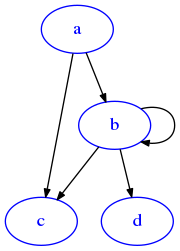

In [10]:

import networkx as nx

# notice with networkx if nodes are already referenced to in an adjacency list 
# you do not need to put them as keys:

G=nx.DiGraph({
    'a':['b','c'],        # node a links to b and c
    'b':['b','c', 'd']    # node b links to b itself, c and d
})

draw_nx(G)

In [15]:
G.out_degree('a')

2

**QUESTION**: What is the outdegree of `'b'` ? Try to think about it and then confirm your thoughts with networkx:

In [12]:
# write here
#print("indegree  b:  %s" % G.in_degree('b'))
#print("outdegree b:  %s" % G.out_degree('b'))

**QUESTION**: We defined _indegree_ and _outdegree_. Can you guess what the _degree_ might be ? In particular, for a self pointing node like `'b'`, what could it be? Try to use `G.degree('b')` methods to validate your thoughts.

In [13]:
# write here
#print("degree  b:  %s" % G.degree('b'))

**ANSWER**: it is the sum of indegree and outdegree. In presence of a self-loop like for `'b'`, we count the self-loop twice, once as outgoing edge and one as incident edge

In [14]:
# write here
#G.degree('b')

<div class="alert alert-warning">

**TO BE CONTINUED ...**
</a>